<a href="https://colab.research.google.com/github/SamT2023/Flooding/blob/main/IMERG-ER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings("ignore")

In [13]:
!pip install h5py

In [11]:
!pip install xarray

In [25]:
import os
import xarray as xr

# Directory containing IMERG files
input_directory = "https://disc.gsfc.nasa.gov/api/jobs/results/67965ceb19c8f2d62a9f797e"
output_file = "E:\PhD_Project_VUB\Weather_Data\Data- Lake Victoria Basin\Satellite Data"

# List all files in the input directory
#file_list = [os.path.join(input_directory, f) for f in os.listdir(input_directory) if f.endswith(".nc")]

# Extract the filename from the URL
file_list = os.path.basename(input_directory)
# Sort files to ensure chronological order (if filenames contain time information)
file_list.sort()

# Open and merge files
print("Merging files...")
datasets = [xr.open_dataset(file) for file in file_list]
merged_data = xr.concat(datasets, dim="time")  # Replace 'time' with the appropriate dimension name

# Save merged data to a single file
print(f"Saving merged file to {output_file}...")
merged_data.to_netcdf(output_file)

# Close the datasets
for ds in datasets:
    ds.close()

print("Merging complete!")


AttributeError: 'str' object has no attribute 'sort'

In [27]:
import os
import requests
import xarray as xr
import tempfile

# URL containing the data
input_url = "https://disc.gsfc.nasa.gov/api/jobs/results/67965ceb19c8f2d62a9f797e"
output_file = "E:\PhD_Project_VUB\Weather_Data\Data- Lake Victoria Basin\Satellite Data"
filename = "MERRA2_100.tavg1_2d_slv_Nx.19800101.nc4"  # Expected filename from the URL

# Download the file
response = requests.get(input_url, stream=True)  # Stream the response to avoid loading the entire file into memory
response.raise_for_status()  # Raise an exception if the download fails

# Create a temporary directory to store the downloaded file
with tempfile.TemporaryDirectory() as temp_dir:
    # Save the downloaded file to the temporary directory
    file_path = os.path.join(temp_dir, filename)
    with open(file_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            # Download in chunks to avoid memory issues with large files
            if chunk:  # filter out keep-alive new chunks
                f.write(chunk)

    # Open the dataset using xarray and explicitly specifying the engine
    dataset = xr.open_dataset(output_file, engine="netcdf4") # explicitly provide the engine

    # Save the dataset to the desired output path
    print(f"Saving file to {output_file}...")
    dataset.to_netcdf(output_file)

    # Close the dataset
    dataset.close()

print("Processing complete!")

ValueError: unrecognized engine 'netcdf4' must be one of your download engines: ['h5netcdf', 'scipy', 'store']. To install additional dependencies, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

In [2]:
!pip install earthaccess

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.


Install the relevant packages

In [4]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 57.3 MB/s eta 0:00:00


Import the libraries relelevant for generating maps

In [5]:
import earthaccess
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib.colors import BoundaryNorm
%matplotlib inline

In [6]:
# Authenticate with Earthdata Login servers
auth = earthaccess.login()

# Search for granules
results = earthaccess.search_data(
    short_name="GPM_3IMERGM",
    version="07",
    temporal=('2014-01-01', '2014-01-01'),
    bounding_box=(-5, 2, 29, 36)
)

# Print search results
print(results)

# Download the granule to the current working directory
downloaded_files = earthaccess.download(
    results,
    local_path='.', # Change this string to download to a different path
)

Enter your Earthdata Login username: olalasamwel
Enter your Earthdata password: ··········
[Collection: {'ShortName': 'GPM_3IMERGM', 'Version': '07'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180.0, 'EastBoundingCoordinate': 180.0, 'NorthBoundingCoordinate': 90.0, 'SouthBoundingCoordinate': -90.0}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2014-01-01T00:00:00.000Z', 'EndingDateTime': '2014-01-31T23:59:59.999Z'}}
Size(MB): 16.699621200561523
Data: ['https://data.gesdisc.earthdata.nasa.gov/data/GPM_L3/GPM_3IMERGM.07/2014/3B-MO.MS.MRG.3IMERG.20140101-S000000-E235959.01.V07B.HDF5']]


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
ds = xr.open_mfdataset(downloaded_files, group="Grid")
ds

ValueError: Failed to decode variable 'time': unable to decode time units 'seconds since 1980-01-06 00:00:00 UTC' with "calendar 'julian'". Try opening your dataset with decode_times=False or installing cftime if it is not installed.

2. Search and Download Granule using earthaccess

In [8]:
!pip install cftime

import xarray as xr

# ... your code ...
# Open the dataset with decode_times=False
ds = xr.open_mfdataset(downloaded_files, group="Grid", decode_times=False)

# Decode the time variable using cftime
ds = xr.decode_cf(ds, use_cftime=True)

# Now you can work with the dataset
ds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.0 MB/s eta 0:00:00


<ipython-input-8-3a4d94c6d276>:11: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds = xr.decode_cf(ds, use_cftime=True)
<ipython-input-8-3a4d94c6d276>:11: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds = xr.decode_cf(ds, use_cftime=True)


ValueError: Array does not contain datetime objects.

<xarray.Dataset> Size: 130MB
Dimensions:                         (time: 1, lon: 3600, lat: 1800, nv: 2,
                                     lonv: 2, latv: 2)
Coordinates:
  * time                            (time) object 8B 2014-01-01 00:00:00
  * lon                             (lon) float32 14kB -179.9 -179.9 ... 179.9
  * lat                             (lat) float32 7kB -89.95 -89.85 ... 89.95
Dimensions without coordinates: nv, lonv, latv
Data variables:
    time_bnds                       (time, nv) object 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
    lon_bnds                        (lon, lonv) float32 29kB dask.array<chunksize=(3600, 2), meta=np.ndarray>
    lat_bnds                        (lat, latv) float32 14kB dask.array<chunksize=(1800, 2), meta=np.ndarray>
    precipitation                   (time, lon, lat) float32 26MB dask.array<chunksize=(1, 145, 1800), meta=np.ndarray>
    randomError                     (time, lon, lat) float32 26MB dask.array<chunksize=(1, 

In [9]:
ds.head()

ValueError: Array does not contain datetime objects.

<xarray.Dataset> Size: 644B
Dimensions:                         (time: 1, lon: 5, lat: 5, nv: 2, lonv: 2,
                                     latv: 2)
Coordinates:
  * time                            (time) object 8B 2014-01-01 00:00:00
  * lon                             (lon) float32 20B -179.9 -179.9 ... -179.6
  * lat                             (lat) float32 20B -89.95 -89.85 ... -89.55
Dimensions without coordinates: nv, lonv, latv
Data variables:
    time_bnds                       (time, nv) object 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
    lon_bnds                        (lon, lonv) float32 40B dask.array<chunksize=(5, 2), meta=np.ndarray>
    lat_bnds                        (lat, latv) float32 40B dask.array<chunksize=(5, 2), meta=np.ndarray>
    precipitation                   (time, lon, lat) float32 100B dask.array<chunksize=(1, 5, 5), meta=np.ndarray>
    randomError                     (time, lon, lat) float32 100B dask.array<chunksize=(1, 5, 5), meta=np.ndar

3. Load Variables

In [11]:
# Get the precipitation, latitude, and longitude variables
precip = ds['precipitation'][0,:,:].values
precip = np.transpose(precip)
theLats = ds['lat'].values
theLons = ds['lon'].values
x, y = np.float32(np.meshgrid(theLons, theLats))

4. Plot the Data using matplotlib and Cartopy

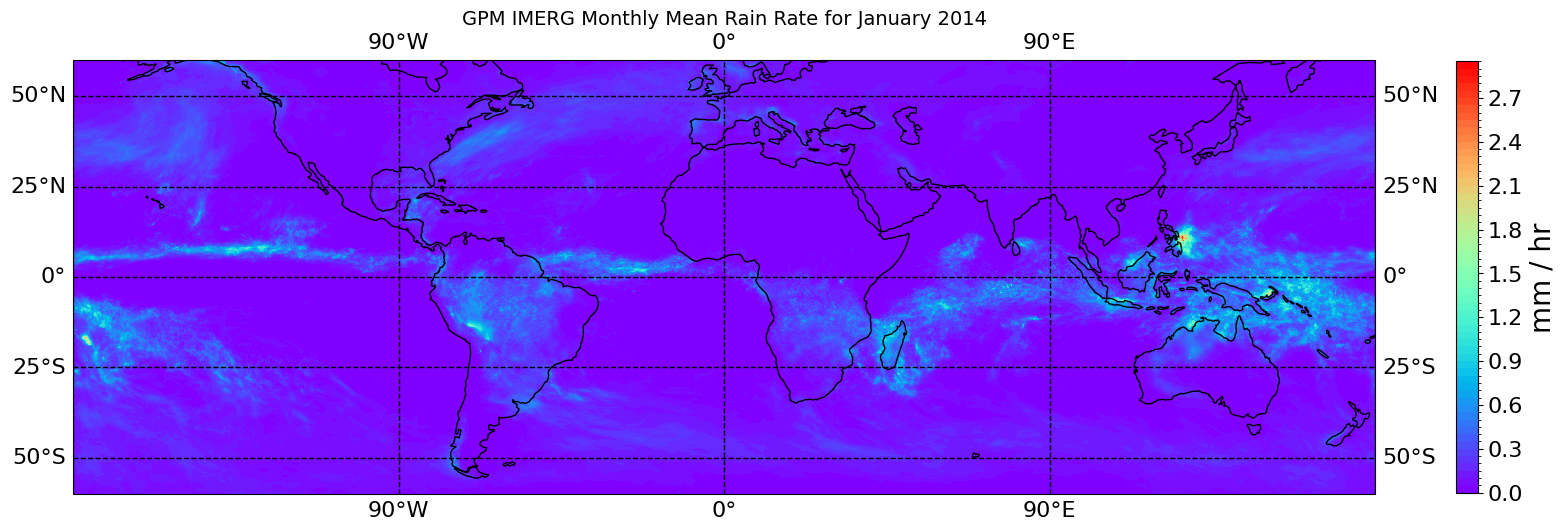

In [23]:
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(21, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, 60])

# Add coastlines and formatted gridlines
ax.coastlines(resolution="110m", linewidth=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([-60, -50, -25, 0, 25, 50, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'}

# Set contour levels
clevs = np.arange(0, 3, 0.05)

# Normalize the data to match clevs
norm = BoundaryNorm(clevs, ncolors=plt.cm.rainbow.N, clip=True)

# Plot the data with pcolormesh
mesh = plt.pcolormesh(x, y, precip, cmap=plt.cm.rainbow, norm=norm, shading="auto")

# Add a colorbar
cb = plt.colorbar(mesh, ax=ax, orientation="vertical", pad=0.05, aspect=20, shrink=0.8)
cb.set_label('mm / hr', size=20)
cb.ax.tick_params(labelsize=16)

# Add a title
plt.title('GPM IMERG Monthly Mean Rain Rate for January 2014', size=14)

# Show the plot
plt.show()

In [13]:
fig.savefig('GPM_3IMERG_plot.png', bbox_inches='tight', pad_inches = 0.1)